# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  '/content/spam.csv' |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#Apellido, Nombre, DNI, email .


Castillo, Dora ; DNI 24452605 ; yo_adonis@outlook.com











Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


Nuestro trabajo se centra en el análisis de un dataset que contiene mensajes de texto etiquetados como "ham" (no spam) o "spam", este etiquetado aportaria a calidad de la comunicación y la seguridad digital a futuro podría ayudar en la identificación /detección de patrones automática de comunicación no deseada para la protección de usuarios contra estafas y amenazas en línea,por ejemplo.

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [ ]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

df = pd.read_csv('/content/spam.csv')


##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [ ]:
df.info()
df.head(5)
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##3- Aplicar PROCESO DE LIMPIEZA

In [ ]:
# En data set no hay valores nulos
# Verificar los valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Imprimir los valores nulos por columna
print(valores_nulos)

Category    0
Message     0
dtype: int64


##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [ ]:
df = pd.read_csv('/content/spam.csv')

# etiquetas 'ham' a 0 y 'spam' a 1 en la columna 'Category'
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Dividir los datos en variables independientes (X) y dependientes (y)
X = df['Message']  # Mensajes
y = df['Category']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  TF-IDF para convertir el texto en vectores numéricos
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Aplicar  conjuntos de entrenamiento y prueba
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Modelo de Regresión Logística y ajustarlo a los datos de entrenamiento
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Calcular la probabilidad de predicción para el conjunto de prueba
y_prob = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]
print(y_prob)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

print(f'\nMatriz de confusión: \n{confusion}')



[0.03909818 0.07573735 0.02611755 ... 0.02121639 0.03306034 0.07756403]

Matriz de confusión: 
[[966   0]
 [ 29 120]]


##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

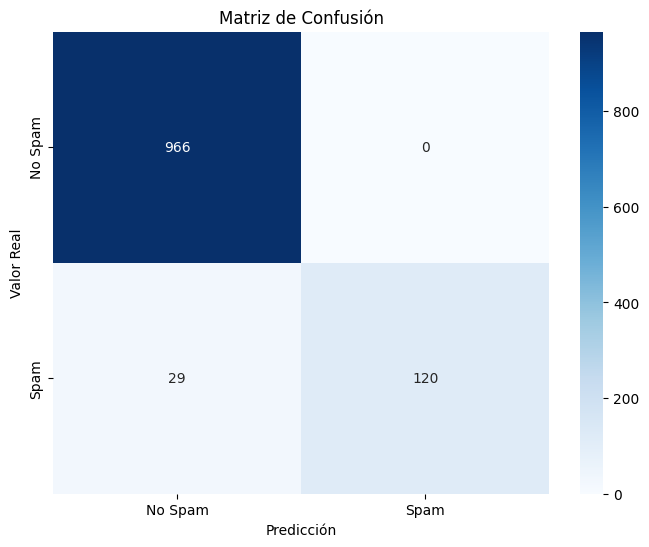


Precisión: 1.00

Exhaustividad: 0.81

Puntuación F1: 0.89

Exactitud: 0.97

Área bajo la curva ROC: 0.99


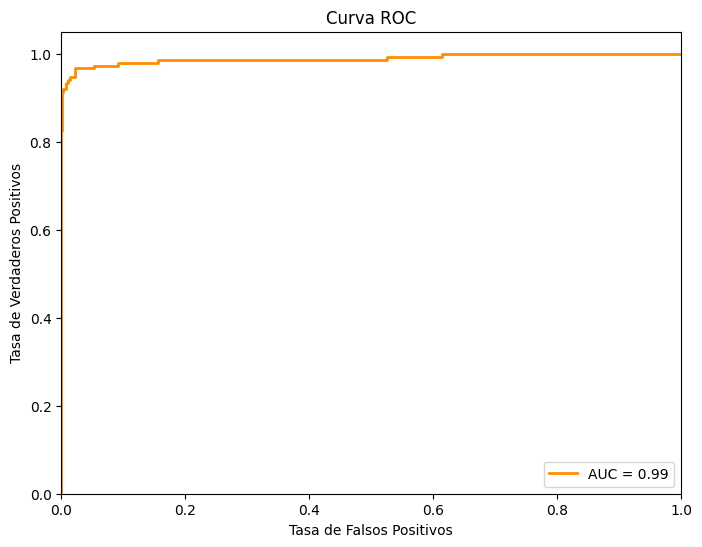


Precisión en el pliegue 1: 0.97

Precisión en el pliegue 2: 0.98

Precisión en el pliegue 3: 0.97

Precisión en el pliegue 4: 0.96

Precisión en el pliegue 5: 0.96

Precisión en el pliegue 6: 0.97

Precisión en el pliegue 7: 0.98

Precisión en el pliegue 8: 0.97

Precisión en el pliegue 9: 0.96

Precisión en el pliegue 10: 0.96

Precisión promedio: 0.97


In [ ]:
# Calcular métricas como precisión, recall, puntuación F1 y área bajo la curva ROC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir otras métricas
print(f'\nPrecisión: {precision:.2f}')
print(f'\nExhaustividad: {recall:.2f}')
print(f'\nPuntuación F1: {f1:.2f}')
print(f'\nExactitud: {accuracy:.2f}')
print(f'\nÁrea bajo la curva ROC: {roc_auc:.2f}')

# Calculamos la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#KFOLD
from sklearn.model_selection import train_test_split, KFold
# Crear un modelo de Regresión Logística
logistic_regression_model = LogisticRegression()

# Realizar validación cruzada K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    logistic_regression_model.fit(X_train_tfidf, y_train)
    y_pred = logistic_regression_model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    logistic_regression_model.fit(X_train_tfidf, y_train)
    y_pred = logistic_regression_model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Imprimir las precisiones para cada pliegue
for fold, accuracy in enumerate(accuracies, 1):
    print(f'\nPrecisión en el pliegue {fold}: {accuracy:.2f}')

# Calcular la precisión promedio de todos los pliegues
mean_accuracy = np.mean(accuracies)
print(f'\nPrecisión promedio: {mean_accuracy:.2f}')


##6- Sacar una conclusión en función de los resultados, errores, y predicciones.
Conclusion:

La precisión es la proporción de mensajes etiquetados como "spam" que realmente son spam. Con una precisión del 1.00

Exhaustividad (Recall): Con un valor de 0.81, el modelo captura el 81% de los mensajes de spam en el conjunto de prueba.

Puntuación F1 (F1 Score): Con una puntuación F1 de 0.89, el modelo logra un buen equilibrio entre precisión y exhaustividad.

Exactitud (Accuracy):Con una exactitud del 0.97, el modelo es muy preciso en la clasificación de mensajes como spam o no spam.

Área bajo la curva ROC (ROC AUC): El valor del área bajo la curva ROC es 0.99, lo que indica que el modelo tiene un rendimiento excelente en la clasificación binaria y es capaz de distinguir entre spam y no spam

En resumen, el modelo entrenado parece ser muy efectivo en la clasificación de mensajes de texto como spam o no spam, con métricas de rendimiento muy sólidas, incluyendo una alta precisión y un alto AUC-ROC.

La validación cruzada K-Fold de precisión en cada pliegue son muy consistentes y varían entre 0.96 y 0.98, lo que indica que el modelo de Regresión Logística tiene buen rendimiento en predecir de spam y no spam, respaldado por la precisión promedio del 0.97 en la validación cruzada K-Fold.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


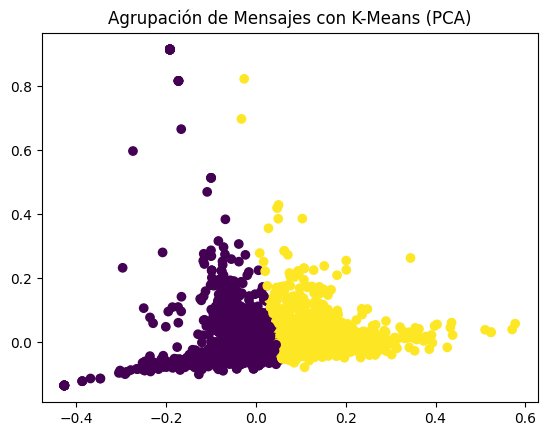

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Cargar tus datos y dividirlos en conjuntos de entrenamiento y prueba
X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar la vectorización de texto (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_tfidf.toarray())

# Crear un modelo K-Means con 2 clusters (ham y spam)
kmeans = KMeans(n_clusters=2, random_state=0)

# Ajustar el modelo K-Means a los datos reducidos
kmeans.fit(X_pca)

# Obtener las etiquetas de los clusters asignados a cada mensaje
labels = kmeans.labels_

# Graficar los datos con colores que representan los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Agrupación de Mensajes con K-Means (PCA)')
plt.show()






In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Cargar tus datos
df = pd.read_csv('/content/spam.csv')

# Etiquetas 'ham' a 0 y 'spam' a 1 en la columna 'Category'
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Cargar tus datos y dividirlos en conjuntos de entrenamiento y prueba
X = df['Message']
y = df['Category']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar la vectorización de texto (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
print("Forma antes de X_train:", X_train_tfidf.shape)
# Definir el número de clusters (K)
K = 3

# Crear y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X_train_tfidf)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Crear un nuevo DataFrame con las etiquetas
labels_df = pd.DataFrame({'Cluster': labels})

# Reiniciar el índice para que coincida con el DataFrame original df
labels_df = labels_df.reset_index(drop=True)

# Unir el nuevo DataFrame con df usando el índice
df = pd.concat([df, labels_df], axis=1)

# Verifica la forma de X_train
print("Forma despues de X_train:", X_train_tfidf.shape)
print("Forma de etiquetas (labels):", labels.shape)
len(df)
cluster_column = df['Cluster']
print(cluster_column)
df.info()

Forma antes de X_train: (4457, 7701)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Forma despues de X_train: (4457, 7701)
Forma de etiquetas (labels): (4457,)
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Cluster, Length: 5572, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  5572 non-null   int64  
 1   Message   5572 non-null   object 
 2   Cluster   4457 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 130.7+ KB


Se eligió K = 3 

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

Conclusion: para obtener mejores datos nos centrariamos en análisis de errores: Examinar los casos en los que el modelo falla y trata de entender por qué lo hace. Esto puede proporcionar información sobre cómo mejorar el modelo.
Deberiamos crear nuevas características o extraer información adicional de los mensajes de texto que puedan ser útiles para la clasificación.Sin desatender la actualización de datos entrenamiento regularmente  para que el modelo esté al tanto de nuevas tendencias y patrones en los mensajes de spam.
Asi como el hecho de considerar la incorporación de características de detección de idioma para adaptar el modelo a idiomas específicos es bienvenido.





